## CS530 Data Mining Homework 4 part 2

#### Question 2 (4 points)

a. Run k-means clustering algorithm using Scikit-learn on the Iris dataset. Create silhouette plots for different k values and find the best k.

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972866
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3648340039670018


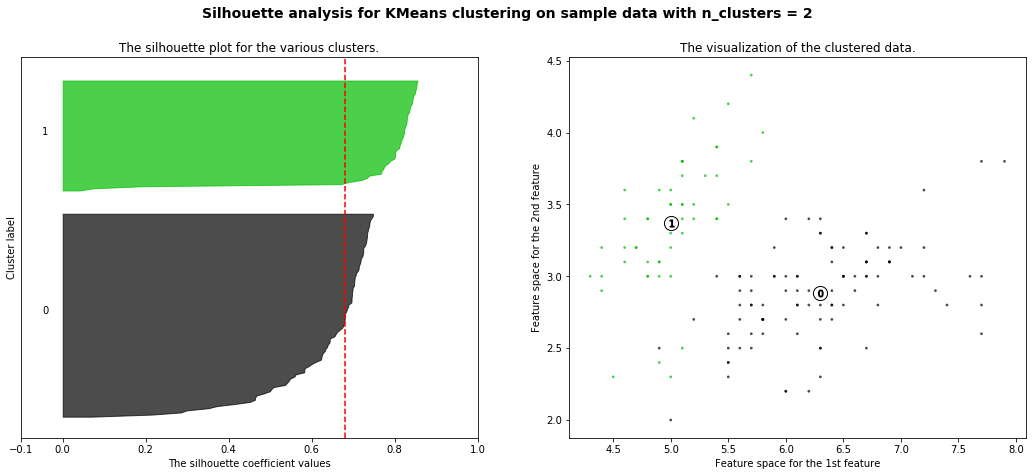

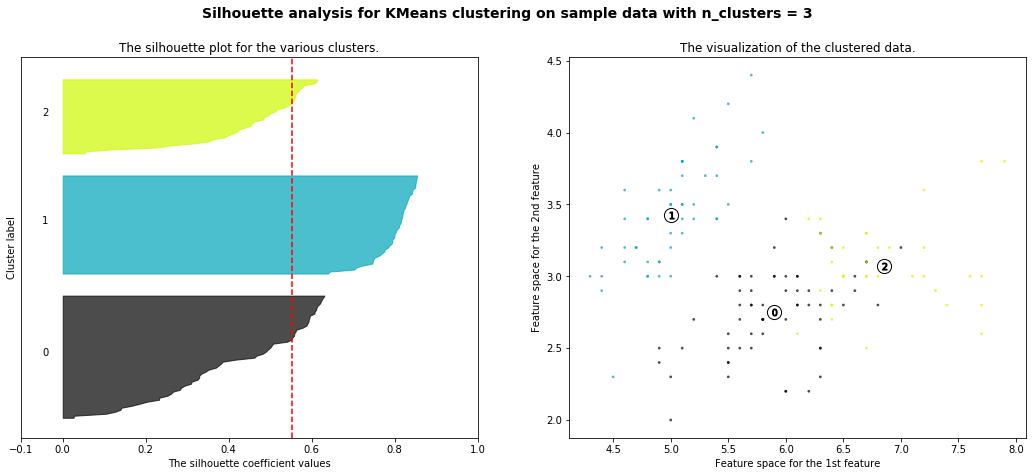

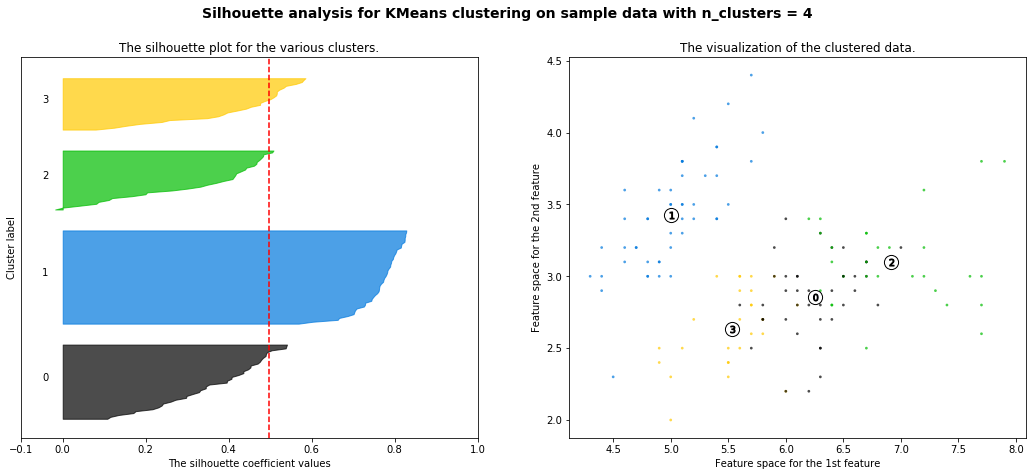

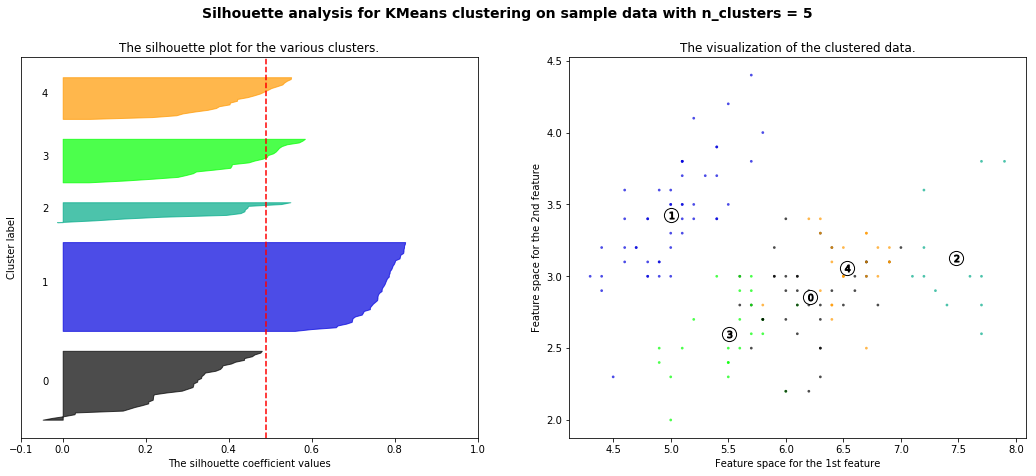

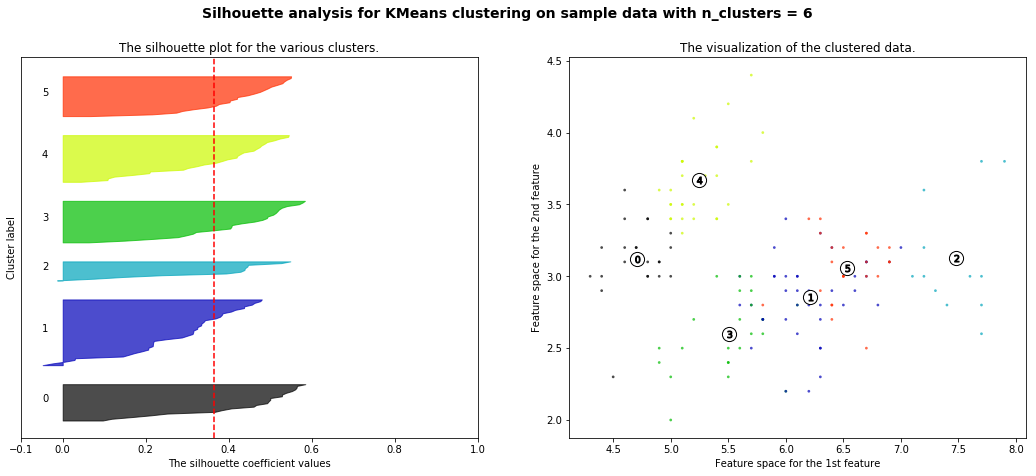

In [9]:
## Your code goes here
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

iris = load_iris()
X = iris.data

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
     # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#Choosing the best k:
#From the silhouette plots, when k = 4, 5 or 6 there is a presence of clusters with below average silhouette scores 
#and wide fluctuations in the size of the silhouette plots. 
#When k = 2 or 3, thickness of the silhouette plots are apparrent, however in k=2, cluster 1 is a lot bigger than cluster 0 
#**Thus picking k=3 to be the ideal number of clusters**

b. Compare your clustering results with the actual labels in the Iris dataset. Is there a difference? Explain what might be the cause of the difference.

In [4]:
## Your code goes here
import pandas as pd 
#choosing k = 3 from part a
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(X)

data = {'Actual':iris.target, 'Clusters':cluster_labels} 
df = pd.DataFrame(data)
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)

#Comparing the actual labels with my clustering results, I can see that target 0 aligns perfectly with cluster 1. 
#However target 1 aligns mostly with cluster 0 with some samples from cluster 2 mixed in. Target 2 aligns mostly with 
#Cluster 2 with some samples from cluster 0 mixed in. The cause of this difference in mostly like due to the nature of the iris
#flower and its attributes. Via the scatter plot w/ cluster labels in part a) you can also see that cluster 0 and 2 
#are not separable

     Actual  Clusters
0         0         1
1         0         1
2         0         1
3         0         1
4         0         1
5         0         1
6         0         1
7         0         1
8         0         1
9         0         1
10        0         1
11        0         1
12        0         1
13        0         1
14        0         1
15        0         1
16        0         1
17        0         1
18        0         1
19        0         1
20        0         1
21        0         1
22        0         1
23        0         1
24        0         1
25        0         1
26        0         1
27        0         1
28        0         1
29        0         1
30        0         1
31        0         1
32        0         1
33        0         1
34        0         1
35        0         1
36        0         1
37        0         1
38        0         1
39        0         1
40        0         1
41        0         1
42        0         1
43        0         1
44        

#### Question 3 (3 points)

a. Look at the hierarchical clustering documentation for [scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). Perform hierachical clustering on the Iris dataset using single, complete, average and centroid linkage. Plot their associated dendrogram.

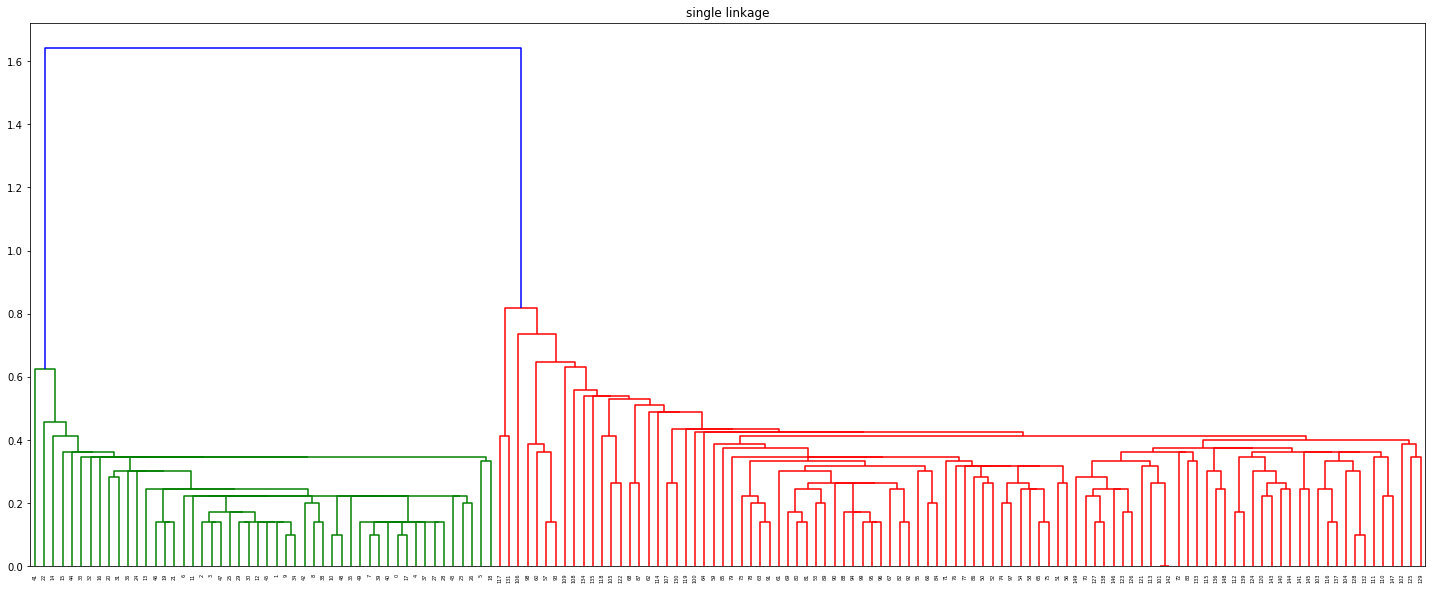

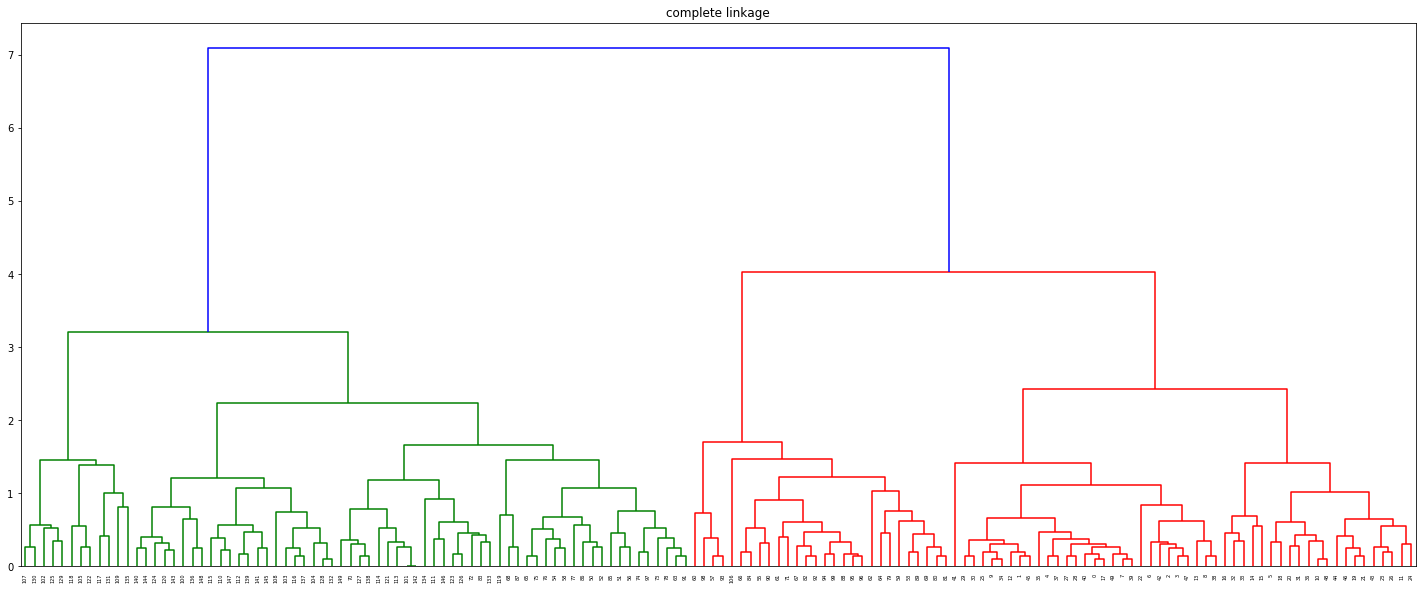

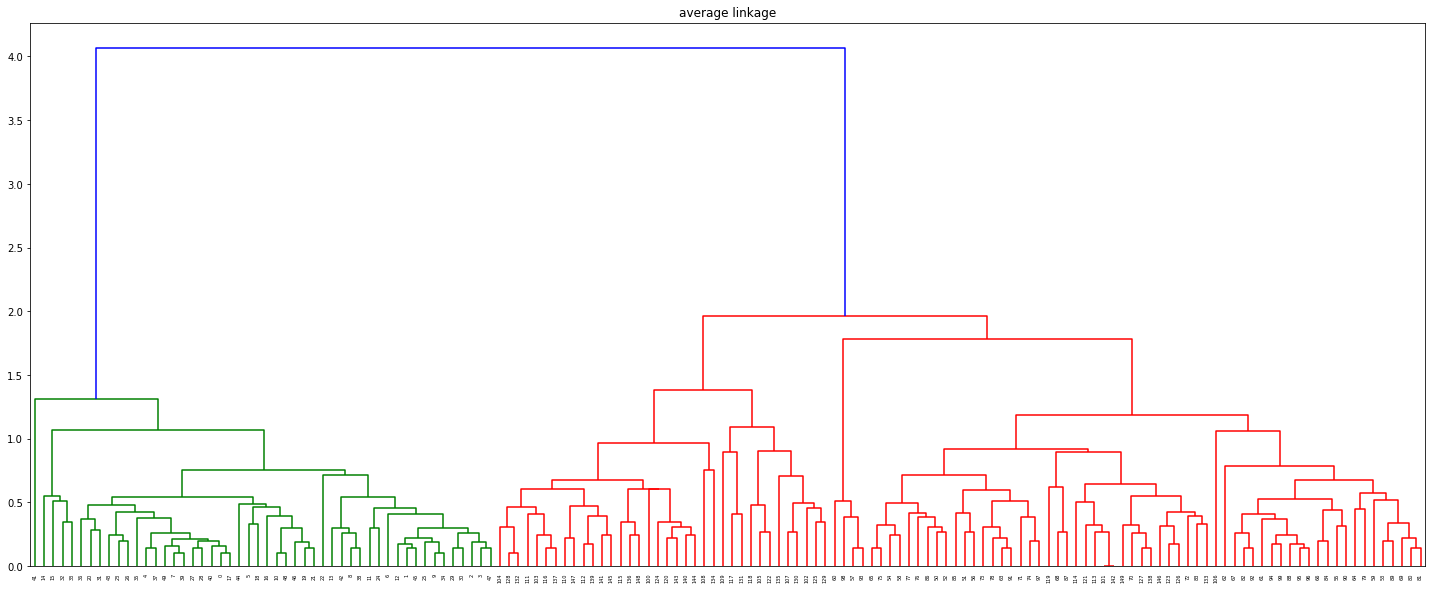

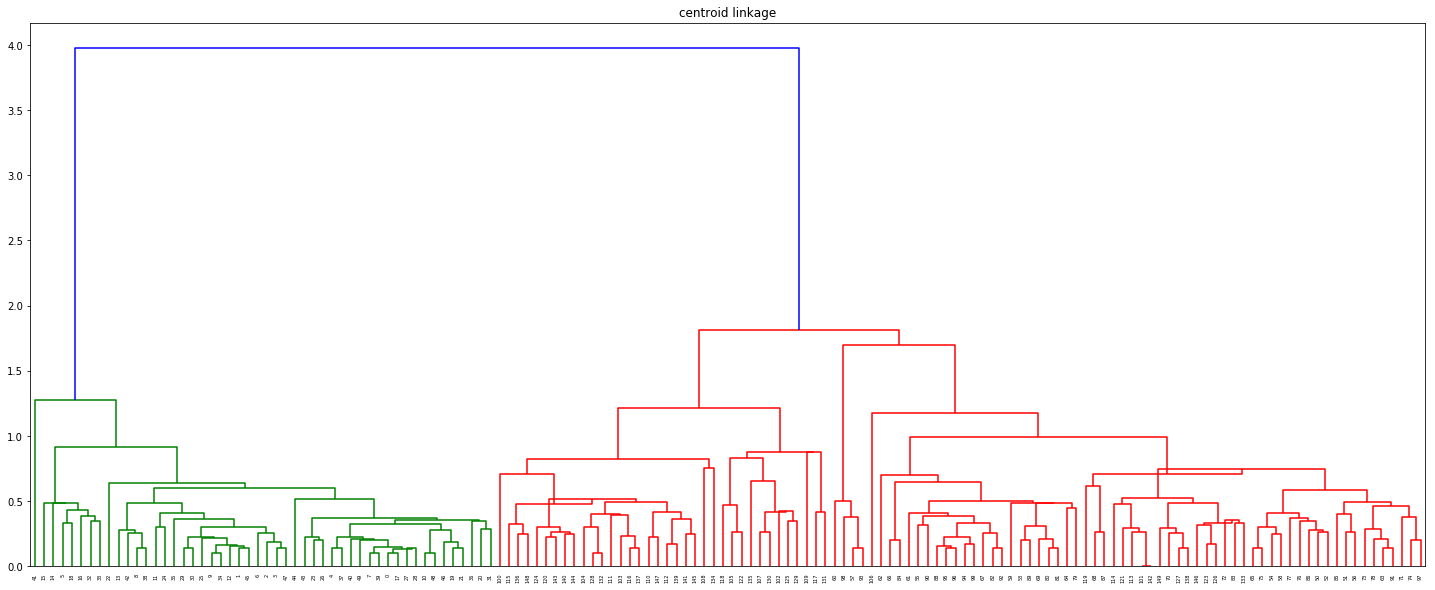

In [10]:
# Your code goes here
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

n_linkage = ['single','complete','average','centroid']
for i in n_linkage:
    
    Z = linkage(X, i)
    fig = plt.figure(figsize=(25, 10))
    plt.title(i + ' linkage')
    dn = dendrogram(Z)
    plt.show()


b. Look at the dendrograms more closely and explain the difference between each linkage method.

In [ ]:
# Your discussion goes here
#single linkage: dissimilarities between the clusters are determined by the shortest distance betweeen an element in one cluster vs an element in another cluster
#Average linkage: dissimilaritiies between clusters are determinded by the avergae distance between any element in one cluster and any element in another cluster.
#Centroid linkage: dissimilarities between clusters are determined by the distance between the centroid of one cluster and the centroid of another cluster.
#complete linkeage: dissimilarites between clusters are determinded by the furthest distance between an element in one cluster and an element in another cluster.

c. Choose your linkage method and the number of clusters you would like to keep. Create clustering labels for the Iris dataset and compare with the actual labels. Explain the difference.

In [8]:
# Your code goes here

chosen_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)

data = {'Actual':iris.target, 'Clusters':chosen_clustering.labels_} 
df = pd.DataFrame(data)
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)


     Actual  Clusters
0         0         1
1         0         1
2         0         1
3         0         1
4         0         1
5         0         1
6         0         1
7         0         1
8         0         1
9         0         1
10        0         1
11        0         1
12        0         1
13        0         1
14        0         1
15        0         1
16        0         1
17        0         1
18        0         1
19        0         1
20        0         1
21        0         1
22        0         1
23        0         1
24        0         1
25        0         1
26        0         1
27        0         1
28        0         1
29        0         1
30        0         1
31        0         1
32        0         1
33        0         1
34        0         1
35        0         1
36        0         1
37        0         1
38        0         1
39        0         1
40        0         1
41        0         1
42        0         1
43        0         1
44        

In [ ]:
# Your discussion goes here
'''
The difference between the actual iris dataset labels & the cluster labels is that Actual: 0 and Cluster: 1 hold the same samples
while actual 1 and 2 have a mix of samples from cluster 0 and 2. This is due to the nature of the dataset & 2 different types of
iris flowers having similar attributes that make them unseparable.
'''